# CC471: LAB09 - Manejo Arboles Filogeneticos con BioPython


## 



# BioPython

BioPython es un paquete Python muy popular para manejar información biologica.

Para instalar:

```
conda install biopython
```
ó

```
pip install biopython
```


BioPython tiene tres funcionalidades principales:

* Sequence Handling
* 3D Structure
* Population Genetics


Referencias: [tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html), [website](http://biopython.org/), [wiki](http://biopython.org/wiki/Category%3AWiki_Documentation) (la mayoria de los ejemplos viene de estas fuentes).
 
# `Bio.Phylo`

Este módulo provee clases funciones y soporte de I/O para trabajar con arboles filogeneticos.
Un excelente tutorial aqui http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc198

# Demo: Que hay en un árbol?
Empezaremos con un árbol que existe y lo inspeccionaremos en diferentes maneras. Despues, colorearemos las ramas utilizando  `phyloXML` y luego lo grabaremos.

Crearemos un archivo Newick llamado simple.dnd 
(((A,B),(C,D)),(E,F,G));
Este arbol no tiene longitudes de ramas solo una topología y terminales etiquetados.


In [1]:
#Un arbol de ejemplo

from Bio import Phylo
tree= Phylo.read("simple.dnd", "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
        Clade()
            Clade(name='E')
            Clade(name='F')
            Clade(name='G')


El Objeto `tree` contiene informacion global del arbol. p.ej., si esta enraizado o no. En el ejemplo tiene un nodo raiz y debajo de el una lista de nodos hasta llegar a las hojas.

La funcion `draw_ascii` genera un dendograma simple en codigo ascii, para la visualizacion en caso no exista otras herramientas.

In [2]:
#Imprimir el árbol
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
_|                                                 |________________________ D
 |
 |                         ________________________ E
 |                        |
 |________________________|________________________ F
                          |
                          |________________________ G



Si tuviera `matplotlib` o `pylab` se puede crear un gráfico usando la funcion `draw`

In [3]:
Phylo.draw(tree)

<Figure size 640x480 with 1 Axes>

## Coloreando ramas en un arbol
Las fiunciones `draw` y `draw_graphviz` soportan diferentes colores  y anchos  de ramas. Ambos atributos se refieren a la rama que precede el nodo dado, y se aplican recursivamente, por lo que todas las ramas descendientes también heredarán los valores de ancho y color asignados durante la visualización.
a partir de Biopython 1.55 se pude utilizar este método: 

In [4]:
tree = tree.as_phyloxml()

Los formatos Newick y Nexus no soportan colores ni anchos de ramas, asy que si usted utiliza estos atributos (si quiere preservarlos) tendrá que guardar estos valores en formato PhyloXML. 

Asignaremos a la raiz el color Gris en formato RGB.


In [5]:
tree.root.color=(128,128,128)

Tambien se puede usar en vez de (128,128,128): "#808080" ó "gray"
Como los colores se asignan en cascada, todo el árbol se convertira a gris. Podemos modificar esto asignando diferentes colores mas abajo en la gerarquia.

Por ejemplo, cambiemos el ancestro común mas reciente (MRCA) de los nodos "E" y "F"
El método `common_ancestor` retorna la referencia a esa rama en el árbol original

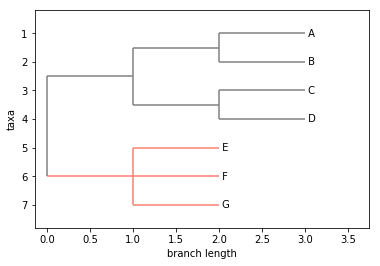

In [6]:
mrca= tree.common_ancestor({"name":"E"},{"name":"F"})
mrca.color="salmon"
Phylo.draw(tree)

Si supieramos exactamente donde se encuentra la rama en terminos de las entradas listadas se puede hacer referencia directa indexandola. de esa manera el indice [0,1] se refiere a el segundo hijo del  primer hijo de la raiz

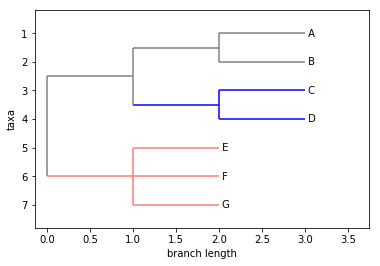

In [7]:
tree.clade[0,1].color="blue"
Phylo.draw(tree)

## Grabar el resultado a un archivo
Podemos llamar la funcion `write` con un nombre de archivo o puntero -- aqui usaremos la salida estandar para ver el resultado y el formato `phyloxml`
PhyloXML Graba los colores asignados de modo que si vemos el archivo con otro visualizador de arboles como Archeopteryx los colores se visualizaran tambien alli.

In [8]:
import sys
Phylo.write(tree,sys.stdout,"phyloxml")

<phyloxml xmlns="http://www.phyloxml.org" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.phyloxml.org http://www.phyloxml.org/1.10/phyloxml.xsd">
  <phylogeny rooted="false">
    <clade>
      <color>
        <red>128</red>
        <green>128</green>
        <blue>128</blue>
      </color>
      <clade>
        <clade>
          <clade>
            <name>A</name>
          </clade>
          <clade>
            <name>B</name>
          </clade>
        </clade>
        <clade>
          <color>
            <red>0</red>
            <green>0</green>
            <blue>255</blue>
          </color>
          <clade>
            <name>C</name>
          </clade>
          <clade>
            <name>D</name>
          </clade>
        </clade>
      </clade>
      <clade>
        <color>
          <red>250</red>
          <green>128</green>
          <blue>114</blue>
        </color>
        <clade>
          <name>E</name>
        </clade>
        <clade

1

aqui usaremos el archivo `mytree.xml` para grabar el resultado en el formato `phyloxml`

In [9]:
with open("mytree.xml", "w") as f:
    Phylo.write(tree,f,"phyloxml")

## Funciones de I/O
De manera semejante a SeqIO y AlignIO, Phylo maneja operaciones de I/O atraves de las funciones`parse, read, write y convert` todas las cuales soportan los formatos de representación de Árboles Newick, NEXUS, phyloXML y NeXML tambien "Comparative Data Analysis Ontology" (CDAO)  

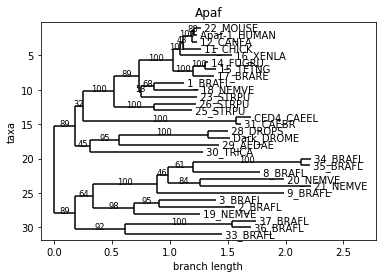

In [10]:
mytree = Phylo.read("apaf.xml", "phyloxml")
Phylo.draw(mytree)

## Usando Objetos tipo Arbol y rama.
Metodos de Busqueda y navegacion

`get_terminals`
Hace una lista de  todos los nodos terminales (hojas).
`get_nonterminals`
Hace una lista de  todos los nodos no terminales (nodos internos).


In [11]:
list1=mytree.get_terminals 
print(list1)




<bound method TreeMixin.get_terminals of Phylogeny(name='Apaf', rooted=True)>


In [12]:
list2=mytree.get_nonterminals
print(list2)

<bound method TreeMixin.get_nonterminals of Phylogeny(name='Apaf', rooted=True)>


## Hacer Alineamientos Multiples de Secuencias y Árboles Filogenéticos

Al alinear dos o más secuencias podemos observar las partes donde ellas difieren  e inferir información útil sobre ellas

Un tipo de información útil es la filogenia.
Esto implica que podemos inferir cómo la evolución puede explicar un conjunto particular de secuencias observadas



### Paso 1: Obtener secuencias y alinearlas

In [13]:
import random
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# generar algunas secuencias aleatorias en base a una secuencia semilla aleatoria
mut = 0.1
BASES = {"A", "C", "G", "T"}
seqs = []
seed = "".join([random.choice(list(BASES)) for _ in range(25 + random.choice([-1, 0, 1]))])

seq_records = []

for i in range(20):
    new_seq = "".join([b if random.random() > mut else random.choice(list(BASES - {b}))\
        for b in seed])
    #create a seq record
    seq_records.append(SeqRecord(Seq(new_seq), id=str(i)))
    
print(seq_records)

[SeqRecord(seq=Seq('GCGGACGAGGAATGGCTGCTGATCCT'), id='0', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('GCGAGGGAGGATGGGCTCCGGATTCG'), id='1', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('GCGAGGGAGGAATGGCTGCGGATTCG'), id='2', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('GCGAGGGAGGCATGGCTTCGTGTTCG'), id='3', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('GCGAGGGAGGAATGGCTACGGATTCG'), id='4', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('GCGAAGGTGGAATGGCTGCGGATTCG'), id='5', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('GCGAGGCAGGAATGGCTGCGGATTAG'), id='6', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('GCGAGGGAGGAATGGCTGCGGTTTCG'), id='7', name='<unknown name>', descripti

Ahora que tenemos objetos tipo `SeqRecord` podemos alinearlos.

para ello los colocamos en un archivo `fasta`.

### Paso 2: Alinear las secuencias

In [14]:
#Escribir nuestras secuencias en formato fasta
with open("seqs.fasta", "w") as f:
    SeqIO.write(seq_records, f, "fasta")

El siguiente paso es alinear realmente estas secuencias.

BioPython tiene sus funciones de alineamiento propias  pero requiere algunas instalaciones más.

Usaremos una  herramienta en linea [online tool](https://www.ebi.ac.uk/Tools/msa/muscle/) que tiene como entrada un archivo `fasta` - el cual ya hemos creado.

tambien se puede usar el comando clustalw

### Paso 3: Cargar el alineamiento resultante

In [15]:
#Abrir el archivo de alineamiento
from Bio import AlignIO
with open("aln.clustal", "r") as aln:
    #usar AlignIO tpara leer el archivo de alineamiento en formato 'clustal' format
    alignment = AlignIO.read(aln, "clustal")

podemos hacer el parsing del alineamiento con el modulo `AlignIO` de BioPython.

Este módulotiene muchas funciones utiles para tratar con alineamiento de secuencias.


### Paso 4: Usar  "distancia" entre todos los pares de secuencias

Usando el parsing del alienamiento , podemos obtener la distancia (o diferencia) entre todas las secuencias.

Esto nos indica, para cada par de secuencias, cuan diferentes son.

In [16]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

#calcular la  matriz de distancias
calculator = DistanceCalculator('identity')
# añade la matriz de  distancias al objeto calculator y lo retorna
dm = calculator.get_distance(alignment)
print(dm)

6	0
1	0.33333333333333337	0
10	0.375	0.29166666666666663	0
17	0.33333333333333337	0.25	0.25	0
12	0.375	0.29166666666666663	0.20833333333333337	0.25	0
19	0.41666666666666663	0.29166666666666663	0.25	0.29166666666666663	0.25	0
5	0.20833333333333337	0.25	0.20833333333333337	0.20833333333333337	0.20833333333333337	0.25	0
18	0.25	0.25	0.20833333333333337	0.20833333333333337	0.20833333333333337	0.25	0.08333333333333337	0
11	0.33333333333333337	0.25	0.20833333333333337	0.20833333333333337	0.16666666666666663	0.25	0.16666666666666663	0.08333333333333337	0
4	0.33333333333333337	0.25	0.125	0.125	0.20833333333333337	0.20833333333333337	0.16666666666666663	0.16666666666666663	0.16666666666666663	0
16	0.375	0.29166666666666663	0.20833333333333337	0.20833333333333337	0.20833333333333337	0.29166666666666663	0.20833333333333337	0.20833333333333337	0.20833333333333337	0.16666666666666663	0
14	0.29166666666666663	0.25	0.20833333333333337	0.20833333333333337	0.20833333333333337	0.25	0.16666666666666663	0

### Paso  5: Construir un arbol UPGMA  a partir de un conjunto de distancias

Finalmente, podemos construir un arbol filogenético a partir de las distancias entre todas las secuencias.

In [17]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

#initialize a DistanceTreeConstructor object based on our distance calculator object
constructor = DistanceTreeConstructor(calculator)

#build the tree
#upgma_tree = constructor.build_tree(alignment)
upgma_tree = constructor.upgma(dm)

Y luego usamos el módulo `Phylo` para visualizar el resultado

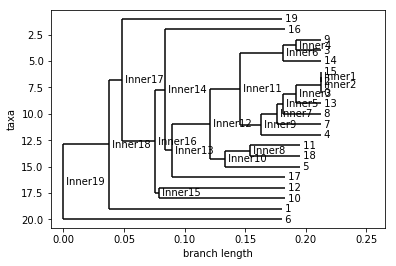

In [18]:
from Bio import Phylo
import pylab
#draw the tree
Phylo.draw(upgma_tree)

### Paso  6: Construir un arbol con el método Neighbor Joining  ( NJ )  a partir de un conjunto de distancias


In [19]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

#initialize a DistanceTreeConstructor object based on our distance calculator object
constructor = DistanceTreeConstructor(calculator)

#build the tree
#upgma_tree = constructor.build_tree(alignment)
nj_tree = constructor.nj(dm)

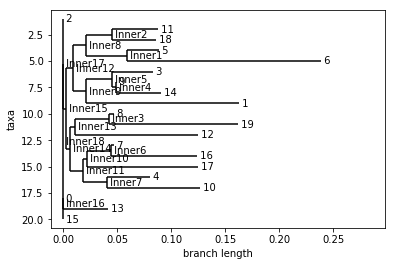

In [20]:
from Bio import Phylo
import pylab
#draw the tree
Phylo.draw(nj_tree)

In [21]:
### Ejercicio Agregar a este Notebook lo siguiente:  a partir del archivo 
### orchid.fasta genere dos arboles filogenéticos 
### utilizando UPGMA y NG describa cuales son los pasos utilizados.
### Grabe los 2 archivos en formato PhyloXML

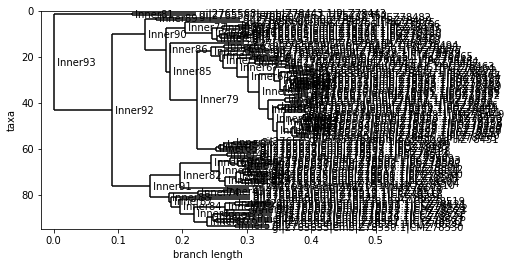

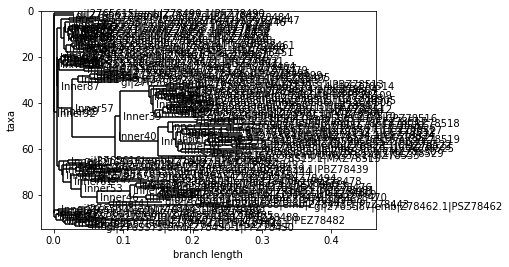

1

In [26]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Phylo
import pylab
import sys

#USANDO MUSCLE ALINEAMOS LAS SECUENCIAS DENTRO DE ORCHID.FASTA, OBTENEMOS EL 
#ARCHIVO aln.clw LO USAMOS A CONTINUACION:
###################abrimos el archivo ya alineado#################
with open("aln.clw", "r") as aln:
    #usar AlignIO para leer el archivo de alineamiento en formato 'clustal'
    alignment = AlignIO.read(aln, "clustal")
###################################################################
#####################calcular la  matriz de distancias####################
calculator = DistanceCalculator('identity')
# añade la matriz de  distancias al objeto calculator y lo retorna
dm = calculator.get_distance(alignment)
#print(dm)
###################################################################
###################Contruimos el arbol UPGMA###############################
#initialize a DistanceTreeConstructor object based on our distance calculator object
constructor = DistanceTreeConstructor(calculator)
#build the tree
#upgma_tree = constructor.build_tree(alignment)
upgma_tree = constructor.upgma(dm)
###################################################################
###################Contruimos el arbol NJ###############################
#initialize a DistanceTreeConstructor object based on our distance calculator object
constructor = DistanceTreeConstructor(calculator)

#build the tree
#upgma_tree = constructor.build_tree(alignment)
nj_tree = constructor.nj(dm)


###dibujamos ambos arboles##
Phylo.draw(upgma_tree)
Phylo.draw(nj_tree)

##Aqui guardo los mapas como archivos .philoxml

Phylo.write(upgma_tree,'UPGMA_TREE.xml','phyloxml')
Phylo.write(nj_tree,'NJ_TREE.xml','phyloxml')
